In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection

In [2]:
from torch.utils.data import DataLoader, TensorDataset
import torch
from torch import nn

In [3]:
# Load the data
Xtrain = pd.read_csv('prepped_data/Xtrain.csv')
Xtest = pd.read_csv('prepped_data/Xtest.csv')
Ytest = pd.read_csv('prepped_data/Ytest.csv')
Ytrain = pd.read_csv('prepped_data/Ytrain.csv')
Xtrain_KNN = pd.read_csv('prepped_data/Xtrain_KNN.csv')
Xtest_KNN = pd.read_csv('prepped_data/Xtest_KNN.csv')

In [7]:
def train_loop(dataloader, model, loss_fn, optimiser):
    avg_loss = 0 # to store running loss
    model.train() # Set model in training mode
    for batch_idx, (X, y) in enumerate(dataloader):
        pred = model(X) # make prediction on current batch
        loss = loss_fn(pred,y) # calculate loss
        loss.backward() # calculates gradients
        optimiser.step() # update weights
        optimiser.zero_grad() # set gradients to zero for next batch
        avg_loss += loss.item() # add loss to running loss
    print(f'Average training Loss: {avg_loss/len(dataloader):.5f}')
    train_loss = avg_loss/len(dataloader)
    return train_loss

In [6]:
def val_loop(dataloader, model, loss_fn):
    loss = 0
    model.eval()
    bs = dataloader.batch_size
    for batch_idx, (X, y) in enumerate(dataloader):
        pred = model(X) # make prediction on current batch
        loss += loss_fn(pred,y).item() # calculate loss

    loss /= len(dataloader)
    print(f'Avg val loss: {loss:.5f} \n')

    return loss

In [9]:
train_bs = 32
val_bs = 32
#Batchsize is a Hyperparameter, it is a tradeoff between speed and accuracy. We use 32 here to start as this was the value from the tutorials.

# Create a tensor dataset, split off the last 20% of the training data for validation
train_dataset = TensorDataset(torch.tensor(Xtrain_KNN.values).float(), torch.tensor(Ytrain.values).float())

# Split the data into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
#The training set is the first 80% of the data, the validation set is the last 20% of the data

train_dataset = 

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=train_bs, shuffle=True, drop_last=True) #dataset
val_dataloader = DataLoader(val_dataset, batch_size=val_bs, shuffle=False, drop_last=True)

Epoch 1
Average training Loss: 53.50605
Avg val loss: 63.15047 

Epoch 2
Average training Loss: 49.79828
Avg val loss: 64.29773 

Epoch 3
Average training Loss: 48.72861
Avg val loss: 63.77944 

Epoch 4
Average training Loss: 48.19111
Avg val loss: 60.69096 

Epoch 5
Average training Loss: 47.78446
Avg val loss: 60.88488 

Epoch 6
Average training Loss: 47.31270
Avg val loss: 60.18574 

Epoch 7
Average training Loss: 46.96327
Avg val loss: 63.04494 

Epoch 8
Average training Loss: 46.61547
Avg val loss: 59.10190 

Epoch 9
Average training Loss: 46.22164
Avg val loss: 56.65016 

Epoch 10
Average training Loss: 45.01067
Avg val loss: 56.38095 

Epoch 11
Average training Loss: 45.28441
Avg val loss: 55.70574 

Epoch 12
Average training Loss: 42.79247
Avg val loss: 53.51017 

Epoch 13
Average training Loss: 41.62826
Avg val loss: 49.62999 

Epoch 14
Average training Loss: 41.87312
Avg val loss: 52.91984 

Epoch 15
Average training Loss: 42.44523
Avg val loss: 47.58382 

Epoch 16
Average tr

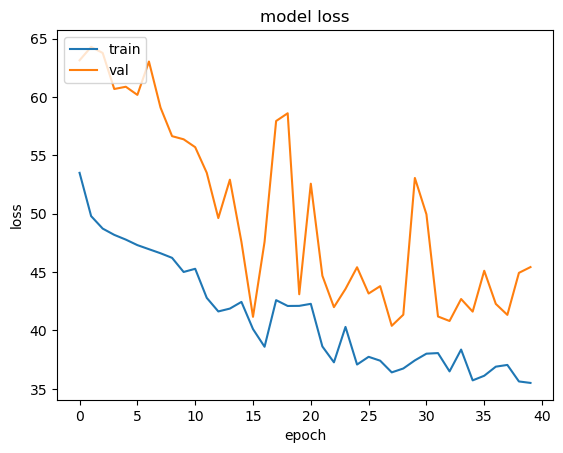

In [12]:
class Network(nn.Module):
    def __init__(self,hid_layer=[100,50]): #Start with a default of 10, can change this in the call
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hid_layer[0]),
            nn.ReLU(),
            nn.Linear(hid_layer[0], hid_layer[1]),
            nn.ReLU(),
            nn.Linear(hid_layer[1], 1)
        )
    def forward(self,x):
        return self.net(x)

input_dim = Xtrain.shape[1]
model = Network([100,50])

learning_rate = 0.01
loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_loss_nn1 = []
val_loss_nn1 = []
epochs = 80
for epoch in range(epochs):
    print(f'Epoch {epoch+1}')
    train_loss_nn1.append(train_loop(train_dataloader, model, loss_fn, optimiser))
    val_loss_nn1.append(val_loop(val_dataloader, model, loss_fn))


#plot the training and validation loss
plt.plot(train_loss_nn1)
plt.plot(val_loss_nn1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [13]:
#Performing a time series split on the training data to split it into 5 folds for cross validation
from sklearn.model_selection import TimeSeriesSplit
# Set the number of splits
n_splits = 5  # You can adjust this as needed

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)

#make a 
def Cross_validation(model, Xtrain, Ytrain, tscv):
    train_loss_nn1 = []
    val_loss_nn1 = []
    epochs = 40
    for train_index, val_index in tscv.split(Xtrain):
        X_train_fold, X_val_fold = Xtrain[train_index], Xtrain[val_index]
        y_train_fold, y_val_fold = Ytrain[train_index], Ytrain[val_index]

        train_dataset = TensorDataset(torch.tensor(X_train_fold).float(), torch.tensor(y_train_fold).float())
        val_dataset= TensorDataset(torch.tensor(X_val_fold).float(), torch.tensor(y_val_fold).float())

        ## Dataloader

        train_bs = 32
        val_bs = 32
        #Batchsize is a Hyperparameter, it is a tradeoff between speed and accuracy. We use 32 here to start as this was the value from the tutorials.

        train_dataloader = DataLoader(train_dataset, batch_size=train_bs, shuffle=True, drop_last=True) #dataset
        val_dataloader = DataLoader(val_dataset, batch_size=val_bs, shuffle=False, drop_last=True)


        # Now you have X_train_fold, y_train_fold as your training data for this fold
        # And X_val_fold, y_val_fold as your validation data for this fold

        # You can train your neural network model on X_train_fold, y_train_fold
        # And evaluate it on X_val_fold, y_val_fold
        # Repeat this process for each fold

        for epoch in range(epochs):
            print(f'Epoch {epoch+1}')
            train_loss_nn1.append(train_loop(train_dataloader, model, loss_fn, optimiser))
            val_loss_nn1.append(val_test_loop(val_dataloader, model, loss_fn))
    return train_loss_nn1, val_loss_nn1
    
    
    




In [14]:
from torch import nn

class Network(nn.Module):
    def __init__(self,hid_layer=[100]): #Start with a default of 10, can change this in the call
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hid_layer[0]),
            nn.ReLU(),
            nn.Linear(hid_layer[0], 1)
        )
    def forward(self,x):
        return self.net(x)

input_dim = Xtrain.shape[1]
model = Network([10])

learning_rate = 0.01
loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)

#train the model
train_loss_nn1, val_loss_nn1 = Cross_validation(model, Xtrain, Ytrain, tscv)

#plot the training and validation loss
plt.plot(train_loss_nn1)
plt.plot(val_loss_nn1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



KeyError: "None of [Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n       ...\n       5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5821],\n      dtype='int32', length=5822)] are in the [columns]"